In [127]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
from pylab import savefig

## Set some pandas options to show the full rows and columns of a DF
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

## Helper plotting functions
[Confusion matrix plotting code care of scikit-learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)

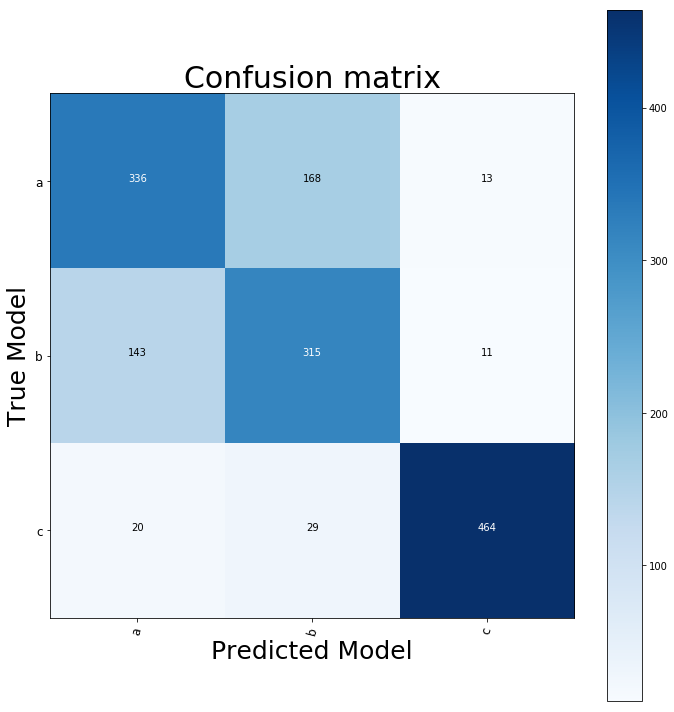

In [128]:
def plot_confusion_matrix(cm, classes, writeOut=True,
                          normalize=False,
                          title='Confusion matrix',
                          outpng="outfile",
                          cmap=plt.cm.Blues, ax=[]):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=75, fontsize=12)
    plt.yticks(tick_marks, classes, fontsize=12)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=10,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Model', fontsize=25)
    plt.xlabel('Predicted Model', fontsize=25)
    plt.tight_layout()
    
    if (writeOut==True):
        outFile = outpng + ".png"
        plt.savefig(outFile, bbox_inches='tight',  dpi=300)
    
cm = np.array([[336, 168, 13], [143, 315, 11], [20, 29, 464]])
plot_confusion_matrix(cm, ["a", "b", "c"], writeOut=False)

In [129]:
## Full list of model names
modelNames = list(["Panmixia", "Ancient Vicariance", 
                 "AV + scdnry cntct", "AV + mig",
                 "AV + cntrct/expand", "AV + mig + cntrct/expand",
                 "AV + sc + cntrct/expand", "Recent Dispersal", 
                 "RD + mig", "RD + cntrct/expand", "RD + mig + cntrct/expand", "class.er"])

modelNames

['Panmixia',
 'Ancient Vicariance',
 'AV + scdnry cntct',
 'AV + mig',
 'AV + cntrct/expand',
 'AV + mig + cntrct/expand',
 'AV + sc + cntrct/expand',
 'Recent Dispersal',
 'RD + mig',
 'RD + cntrct/expand',
 'RD + mig + cntrct/expand',
 'class.er']

In [7]:
## Load data for 3 confusion matrices; these are the full 11-model matrices with raw numbers of correctly classified
##   simulations

## Read in for dataset 2; which has 8 inland 13 coastal and 20455 SNPs
D2confusionMat = pd.read_csv('./Dataset2/Dataset2_RFconfusionMatrix.csv', delimiter = '\t')
D2confusionMat.columns=modelNames
D2confusionMat

,Panmixia,Ancient Vicariance,AV + scdnry cntct,AV + mig,AV + cntrct/expand,AV + mig + cntrct/expand,AV + sc + cntrct/expand,Recent Dispersal,RD + mig,RD + cntrct/expand,RD + mig + cntrct/expand,class.er
Thuja_1_MSFS,8485,0,0,0,0,0,0,454,1056,2,3,0.1515
Thuja_2_MSFS,0,7974,44,1698,0,186,98,0,0,0,0,0.2026
Thuja_3_MSFS,0,19,8687,122,0,2,302,465,158,91,154,0.1313
Thuja_4_MSFS,0,1201,228,8343,0,85,143,0,0,0,0,0.1657
Thuja_5_MSFS,0,0,0,0,9007,993,0,0,0,0,0,0.0993
Thuja_6_MSFS,0,162,0,183,832,8791,32,0,0,0,0,0.1209
Thuja_7_MSFS,0,27,270,67,0,5,9631,0,0,0,0,0.0369
Thuja_8_MSFS,1861,0,516,0,0,0,0,4199,3409,9,6,0.5801
Thuja_9_MSFS,2251,0,314,0,0,0,0,3775,3631,11,18,0.6369
Thuja_10_MSFS,48,0,253,3,0,0,4,26,80,5415,4171,0.4585


In [14]:
## Read in for dataset 2; which has 8 inland 13 coastal and 20455 SNPs
D5confusionMat = pd.read_csv('./Dataset5/Dataset5_RFconfusionMatrix.csv', delimiter = '\t')
D5confusionMat.columns=modelNames
D5confusionMat

,Panmixia,Ancient Vicariance,AV + scdnry cntct,AV + mig,AV + cntrct/expand,AV + mig + cntrct/expand,AV + sc + cntrct/expand,Recent Dispersal,RD + mig,RD + cntrct/expand,RD + mig + cntrct/expand,class.er
Thuja_1_MSFS,8355,0,0,0,0,0,0,552,1085,1,7,0.1645
Thuja_2_MSFS,0,7082,53,2475,0,211,179,0,0,0,0,0.2918
Thuja_3_MSFS,0,5,8291,188,0,1,294,584,183,205,249,0.1709
Thuja_4_MSFS,0,1586,245,7809,0,67,288,0,0,5,0,0.2191
Thuja_5_MSFS,0,0,0,0,8999,1001,0,0,0,0,0,0.1001
Thuja_6_MSFS,0,265,0,210,839,8644,42,0,0,0,0,0.1356
Thuja_7_MSFS,0,25,266,180,0,6,9521,1,0,1,0,0.0479
Thuja_8_MSFS,1856,0,715,0,0,0,0,4003,3408,8,10,0.5997
Thuja_9_MSFS,2234,0,487,0,0,0,0,3669,3580,13,17,0.6420
Thuja_10_MSFS,42,0,583,23,0,0,21,50,100,4737,4444,0.5263


In [15]:
## Read in for dataset 2; which has 8 inland 13 coastal and 20455 SNPs
D8confusionMat = pd.read_csv('./Dataset8/Dataset8_RFconfusionMatrix.csv', delimiter = '\t')
D8confusionMat.columns=modelNames
D8confusionMat

,Panmixia,Ancient Vicariance,AV + scdnry cntct,AV + mig,AV + cntrct/expand,AV + mig + cntrct/expand,AV + sc + cntrct/expand,Recent Dispersal,RD + mig,RD + cntrct/expand,RD + mig + cntrct/expand,class.er
Thuja_1_MSFS,8005,0,2,0,0,0,0,722,1258,10,3,0.1995
Thuja_2_MSFS,0,6396,62,2926,0,251,364,0,0,1,0,0.3604
Thuja_3_MSFS,5,5,7900,212,0,0,343,648,298,301,288,0.2100
Thuja_4_MSFS,0,1947,246,7197,0,48,554,0,0,6,2,0.2803
Thuja_5_MSFS,0,0,0,0,9042,958,0,0,0,0,0,0.0958
Thuja_6_MSFS,0,419,0,225,972,8310,74,0,0,0,0,0.1690
Thuja_7_MSFS,0,46,320,515,2,42,9066,0,0,8,1,0.0934
Thuja_8_MSFS,2037,0,947,0,0,0,0,3774,3209,22,11,0.6226
Thuja_9_MSFS,2529,0,640,0,0,0,0,3504,3295,18,14,0.6705
Thuja_10_MSFS,53,0,801,13,0,0,29,63,108,4710,4223,0.5290


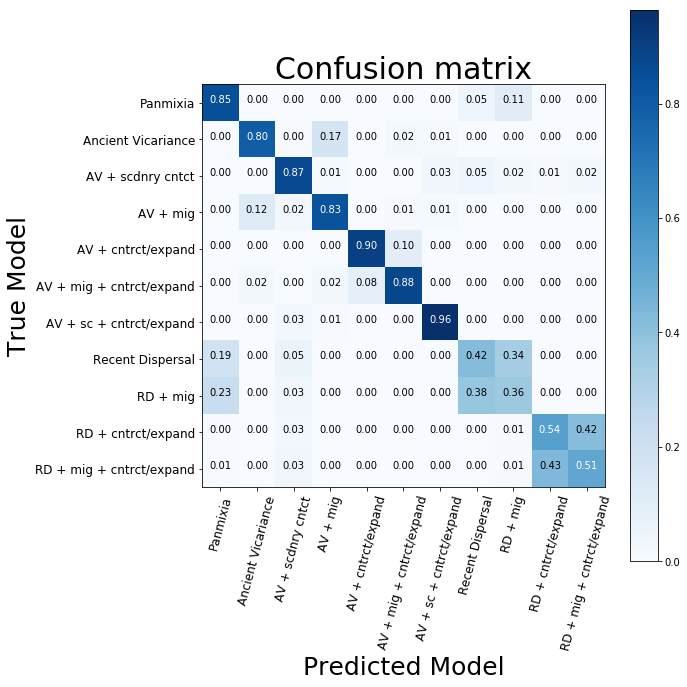

In [16]:
## dataset 2 confusion matrix
d2array = np.array(D2confusionMat[D2confusionMat.columns[:-1]])
plot_confusion_matrix(d2array, modelNames[:-1], writeOut=False, normalize=True, outpng="RfConfMat")

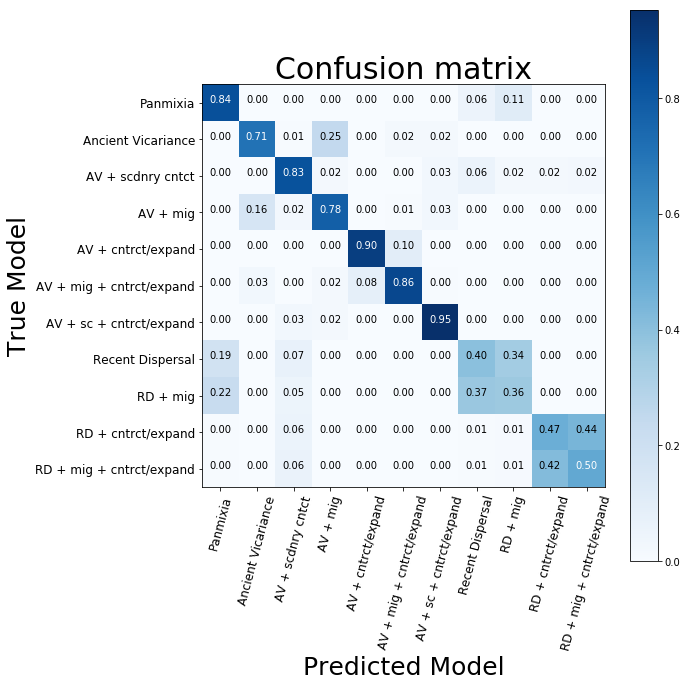

In [19]:
## dataset 4 confusion matrix
d5array = np.array(D5confusionMat[D5confusionMat.columns[:-1]])
plot_confusion_matrix(d5array, modelNames[:-1], writeOut=False, normalize=True, outpng="RfConfMat")

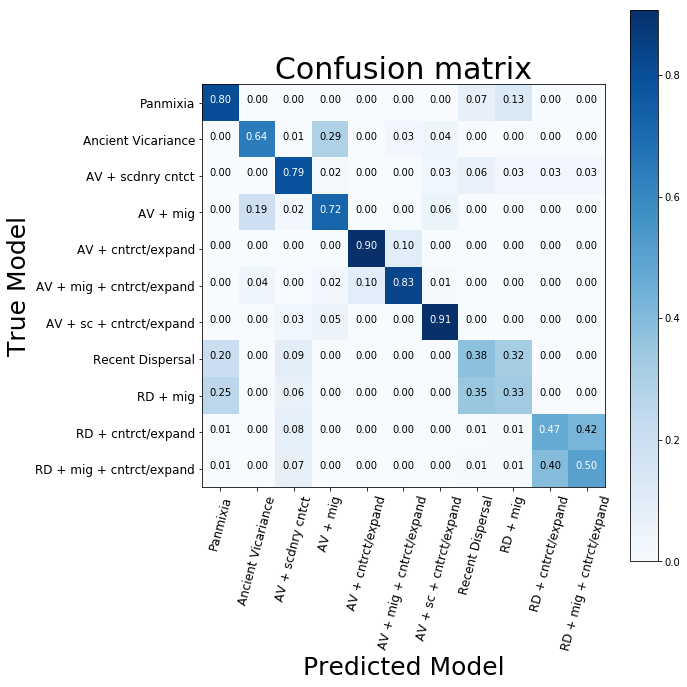

In [20]:
## dataset 6 confusion matrix
d8array = np.array(D8confusionMat[D8confusionMat.columns[:-1]])
plot_confusion_matrix(d8array, modelNames[:-1], writeOut=False, normalize=True, outpng="RfConfMat")

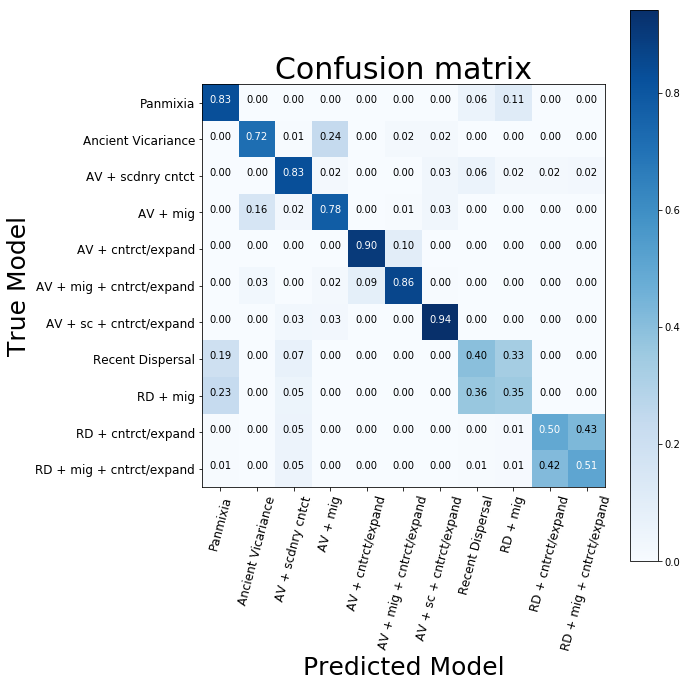

In [21]:
## Combine the 3 confusion matrixes into 1 and plot that confusion matrix

list = (d2array, d5array, d8array) 
newArray = np.mean(list, axis=0)
plot_confusion_matrix(newArray, modelNames[:-1], writeOut=True, normalize=True, outpng="Average11ModConfusionMatrix")

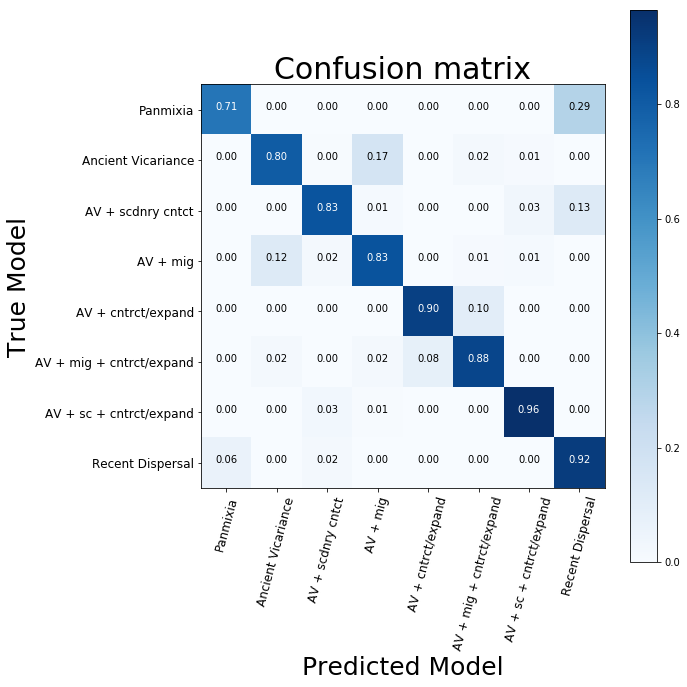

In [22]:
## Load data for 3 confusion matrices; these are the grouped 8-model matrices with raw numbers of correctly classified
##   simulations. Here, the recent dispersal models have been collapsed into one

Groupmods = modelNames[0:8]
Groupmods.append(modelNames[11])

## Read in for dataset 2; which has 8 inland 13 coastal and 20455 SNPs
D2confusionMatGrp = pd.read_csv('./Dataset2/Dataset2_RFconfusionMatrix_GROUP.csv', delimiter = '\t')
D2confusionMatGrp.columns = Groupmods
D2confusionMatGrp

## dataset 2 group confusion matrix
d2arrayGrp = np.array(D2confusionMatGrp[D2confusionMatGrp.columns[:-1]])
plot_confusion_matrix(d2arrayGrp, Groupmods[:-1], writeOut=False, normalize=True, outpng="RfConfMat")

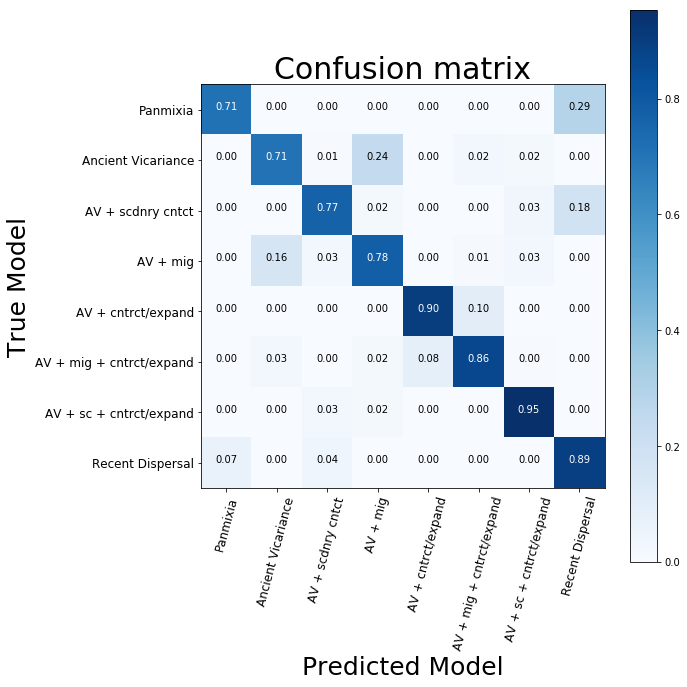

In [23]:
## Read in for dataset 4; which has 
D5confusionMatGrp = pd.read_csv('./Dataset5/Dataset5_RFconfusionMatrix_GROUP.csv', delimiter = '\t')
D5confusionMatGrp.columns = Groupmods
D5confusionMatGrp

## dataset 2 group confusion matrix
d5arrayGrp = np.array(D5confusionMatGrp[D5confusionMatGrp.columns[:-1]])
plot_confusion_matrix(d5arrayGrp, Groupmods[:-1], writeOut=False, normalize=True, outpng="RfConfMat")

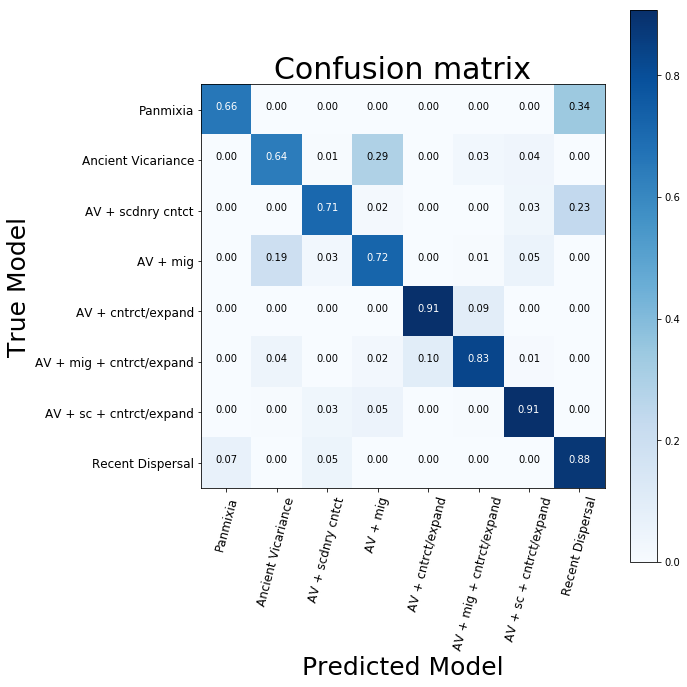

In [24]:
## Read in for dataset 6; which has 
D8confusionMatGrp = pd.read_csv('./Dataset8/Dataset8_RFconfusionMatrix_GROUP.csv', delimiter = '\t')
D8confusionMatGrp.columns = Groupmods
D8confusionMatGrp

## dataset 6 group confusion matrix
d8arrayGrp = np.array(D8confusionMatGrp[D8confusionMatGrp.columns[:-1]])
plot_confusion_matrix(d8arrayGrp, Groupmods[:-1], writeOut=False, normalize=True, outpng="RfConfMat")

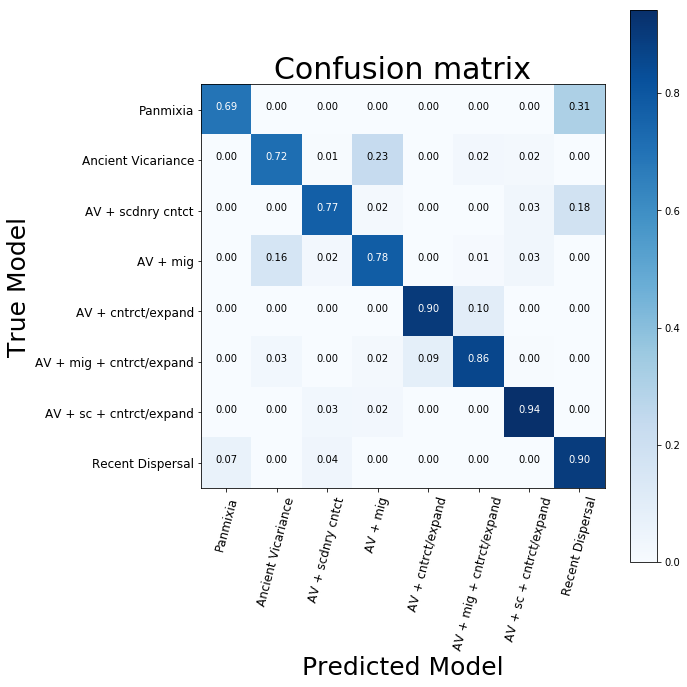

In [25]:
## Combine the 3 confusion matrixes into 1 and plot that confusion matrix

list = (d2arrayGrp, d5arrayGrp, d8arrayGrp) 
newArray = np.mean(list, axis=0)
plot_confusion_matrix(newArray, Groupmods[:-1], writeOut=True, normalize=True, outpng="Average8ModConfusionMatrix_Grp")

# Random Forest Predictions

In [132]:
def getSelectedModel(infile):
    """this function takes the prediction output from delimitR in the form of a csv file"""
    
    predictions = pd.read_csv(infile, delimiter = '\t')

    ModNames = []
    ModSelected = []
    ModVotes = []
    ModProbs = []
    for i in np.unique(predictions.iloc[:,0]):
        ModNames.append(i)
        ModSelected.append(sum(predictions.iloc[:,0]==i))
        ModVotes.append(np.mean(predictions.loc[predictions.iloc[:,0]==i].iloc[:,i]))
        ModProbs.append(np.mean(predictions.loc[predictions.iloc[:,0]==i].iloc[:,12]))

    return ModNames, ModSelected, ModVotes, ModProbs


In [136]:
infile = './Dataset2/PredictionOut_Dataset2.csv'
predictions = pd.read_csv(infile, delimiter = '\t')
#d2pred = getSelectedModel(infile)
#d2pred
predictions

,selected group,votes group1,votes group2,votes group3,votes group4,votes group5,votes group6,votes group7,votes group8,post.proba
1,7,0,76,128,115,0,60,621,0,0.742333
2,7,0,106,119,139,0,53,583,0,0.700667
3,7,0,89,104,109,0,47,651,0,0.792067
4,7,0,103,125,131,0,45,596,0,0.766133
5,7,0,85,103,124,0,52,636,0,0.774400
6,7,0,59,70,53,0,36,782,0,0.894767
7,7,0,80,88,91,0,42,699,0,0.808367
8,7,0,99,112,126,0,53,610,0,0.724500
9,7,0,82,85,100,0,47,686,0,0.882800
10,7,0,104,121,122,0,51,602,0,0.791567


In [144]:
## Bring in predictions from RF to plot model probs and proportion of votes. 
## Might be best to start with Posterior Prob of model selected

## prediction for dataset 2
predictionsD2 = pd.read_csv('./Dataset2/PredictionOut_Dataset2.csv', delimiter = '\t',header=0)
predictionsD2
#sum(predictionsD2.iloc[:,0]==7)
np.mean(predictionsD2.iloc[:,7])
np.mean(predictionsD2.iloc[:,9])

0.7897849999999998

In [145]:
## prediction for dataset 2
predictionsD5 = pd.read_csv('./Dataset5/PredictionOut_Dataset5.csv', delimiter = '\t')
predictionsD5
sum(predictionsD5.iloc[:,0]==7)
np.mean(predictionsD5.loc[predictionsD5.iloc[:,0]==7].iloc[:,7])
np.mean(predictionsD5.iloc[:,12])

0.7126640000000001

In [146]:
## prediction for dataset 6
predictionsD8 = pd.read_csv('./Dataset8/PredictionOut_Dataset8.csv', delimiter = '\t')
predictionsD8
sum(predictionsD8.iloc[:,0]==7)
np.mean(predictionsD8.loc[predictionsD2.iloc[:,0]==7].iloc[:,7])
np.mean(predictionsD8.iloc[:,12])

0.6727273333333335

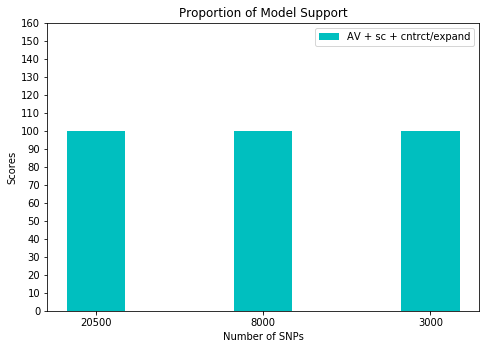

In [60]:
N = 3
mod7votes = (100, 100, 100)

ind = np.arange(int(N)) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(('20500', '8000', '3000'), mod7votes, width, color='c')
#ax.bar(('20500', '8000', '3000'), mod4votes, width,bottom=mod7votes, color='m')
#ax.bar(('20500', '8000', '3000'), mod3votes, width,bottom=mod7votes, color='b')
#ax.bar(('20500', '8000', '3000'), mod10votes, width,bottom=mod3votes, color='r')
#ax.bar(('20500', '8000', '3000'), mod11votes, width,bottom=mod3votes[2]+mod10votes[2], color='g')
ax.set_ylabel('Scores')
ax.set_xlabel('Number of SNPs')
ax.set_title('Proportion of Model Support')
ax.set_xticks(ind, ('9000', '2500', '1000'))
ax.set_yticks(np.arange(0, 170, 10))
ax.legend(labels=[modelNames[6], modelNames[3], modelNames[2], modelNames[9], modelNames[10]])
plt.show()

# Observed jSFS

In [107]:
def plot_ObsReplicateSFS(observedSFSfile, outfile, writeOut=True, normalize=True, sim = False, pop1size=10, pop2size=10, reps=100, vmax=50):
        
        '''This file takes and observed SFS files, where each line is a different flattened SFS,
        and then averages the values for each SFS cell and then writes out an average joint SFS'''
        
        ## import matrix
        sfsMatrix = pd.read_csv(observedSFSfile, delimiter = '\t', header=None)
 
        ## get means of each column
        means = sfsMatrix.mean(axis=0)[:-1]
        
        if (sim == True):
            means = sfsMatrix.mean(axis=0)
            
        if (normalize == True):
            Total = np.sum(means) 
            means = means/Total
        
        ## split up array into groups to write out dataframe
        group = np.split(means, pop1size+1)
        
        matrix = np.zeros((pop1size+1, pop2size+1,))
        
        for i in range(0, len(group), 1):
            #print(group[i])
            matrix[:][i] = group[i]
            #matrix[:,i] = group[i]
            #print(group[i])
        SummarizedSFS = pd.DataFrame(matrix)
        SummarizedSFS = SummarizedSFS.iloc[::-1]
        SummarizedSFS
        
        sns_plot = sns.heatmap(SummarizedSFS, cmap='coolwarm', robust=True,  vmax=vmax, vmin=0)
        
        if (writeOut==True):
            fig = sns_plot.get_figure()
            fig.savefig(outfile, dpi=300)
        
        return sns_plot
        #return SummarizedSFS

In [197]:
pop1=26
pop2=24

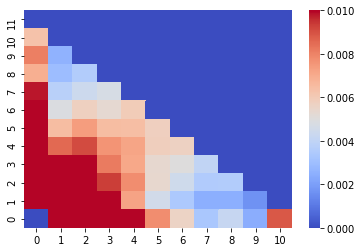

In [119]:
infile="./Dataset2/jSFS_dataset2_noMono4plot.obs"
SummarizedSFS = plot_ObsReplicateSFS(infile, "dataset2_jSFSobs_noMono.png", normalize=True, writeOut=True, sim=False, pop1size=11, pop2size=10, reps=100, vmax=0.01)


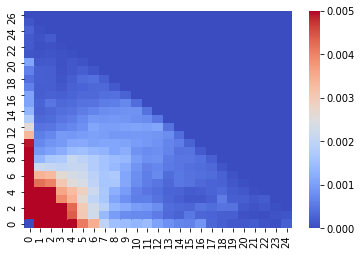

In [120]:
infile="./Dataset5/jSFS_dataset5_noMono4plot.obs"
SummarizedSFS = plot_ObsReplicateSFS(infile, "dataset5_jSFSobs.png", normalize=True,writeOut=True, sim=False, pop1size=26, pop2size=24, reps=100, vmax=0.005)


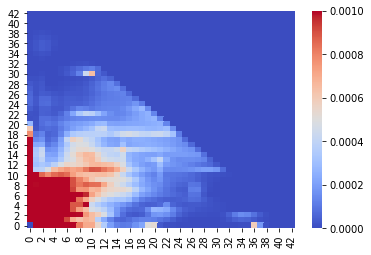

In [125]:
infile="./Dataset8/jSFS_dataset8_noMono4plot.obs"
SummarizedSFS = plot_ObsReplicateSFS(infile, "dataset8_jSFSobs.png", normalize=True,writeOut=True, sim=False, pop1size=42, pop2size=42, reps=100, vmax=0.001)


# Simulated jSFS

In [68]:
def format_simulatedSFS(simSFSfile):
        
        '''This file takes and observed SFS files, where each line is a different flattened SFS,
        and then averages the values for each SFS cell and then writes out an average joint SFS'''
        
        ## put all lines here, which is what will guide what you replace
        allLines = open(simSFSfile, 'r').readlines()
        
        tempOutfile = open("tempSFSfile.obs", 'w+')
    
        ## go through each line in file to fine the ones with sample size and snps
        for linenum in range(0, len(allLines), 1):
            if allLines[linenum].split("\t")[0] == "0":
                tempOutfile.write(allLines[linenum])
        
        
       #plot_ObsReplicateSFS("tempSFSfile.obs", pop1size=pop1, pop2size=pop2, reps=rep, vmax=vmax)
        
          

In [41]:
pop1=42
pop2=42
vmax=0.001

In [73]:

sfsMatrix = pd.read_csv("tempSFSfile.obs", delimiter = '\t', header=None)
sfsMatrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,1599,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,1610,1611,1612,1613,1614,1615,1616,1617,1618,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1630,1631,1632,1633,1634,1635,1636,1637,1638,1639,1640,1641,1642,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652,1653,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667,1668,1669,1670,1671,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700,1701,1702,1703,1704,1705,1706,1707,1708,1709,1710,1711,1712,1713,1714,1715,1716,1717,1718,1719,1720,1721,1722,1723,1724,1725,1726,1727,1728,1729,1730,1731,1732,1733,1734,1735,1736,1737,1738,1739,1740,1741,1742,1743,1744,1745,1746,1747,1748,1749,1750,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848
0,0,100,22,8,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,58,26,12,11,3,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,24,12,15,8,7,1,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,12,15,7,11,7,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,11,13,10,6,6,4,4,2,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,7,5,13,6,6,3,3,1,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,109,27,7,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,114,65,28,11,2,3,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,34,24,17,7,3,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,17,15,13,6,5,2,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,12,6,5,10,4,6,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,3,9,10,6,5,8,5,0,0,0,3,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [75]:
means = sfsMatrix.mean(axis=0)
            
Total = np.sum(means) 
means = means/Total
    
pop1size=42
pop2size=42

## split up array into groups to write out dataframe
group = np.split(means, pop1size+1)

matrix = np.zeros((pop1size+1, pop2size+1,))

for i in range(0, len(group), 1):
    #print(group[i])
    matrix[:][i] = group[i]
    #matrix[:,i] = group[i]
    #print(group[i])
SummarizedSFS = pd.DataFrame(matrix)
SummarizedSFS = SummarizedSFS.iloc[::-1]
SummarizedSFS

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
42,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+

In [90]:
np.array(SummarizedSFS)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02611306, 0.0269561 , 0.0206123 , ..., 0.        , 0.        ,
        0.        ],
       [0.10584169, 0.05369962, 0.0269562 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.10586465, 0.02622277, ..., 0.        , 0.        ,
        0.        ]])

In [106]:

up_indices = np.triu_indices(42)
array_SFS = np.array(SummarizedSFS)
array_SFS[up_indices] 


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [88]:
row_index = np.triu_indices(42)[0]
col_index = np.triu_indices(42)[1]

array_len = len(SummarizedSFS)*len(SummarizedSFS)
array_len
for i in range(0, array_len):
    print(i)

#SummarizedSFS[np.triu_indices(42)[0]][np.triu_indices(42)[1]]
#SummarizedSFS[np.triu_indices(42)]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

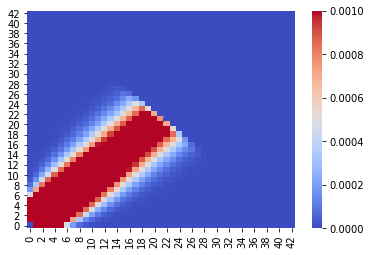

In [108]:
## Model 1: Panmixia

infile="./Dataset8/Thuja_1_MSFS.obs"
format_simulatedSFS(infile)
plot_ObsReplicateSFS("tempSFSfile.obs", "SimulatedSFSmodel1.png", normalize=True, writeOut=True, sim=True, pop1size=pop1, pop2size=pop2, reps=100, vmax=vmax)

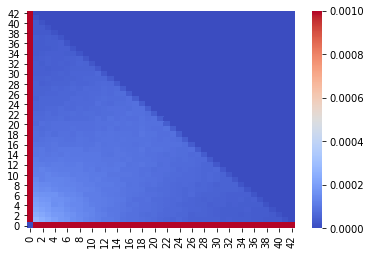

In [43]:
## Model 2: AV

infile="./Dataset8/Thuja_2_MSFS.obs"
format_simulatedSFS(infile)
plot_ObsReplicateSFS("tempSFSfile.obs", "SimulatedSFSmodel2.png", normalize=True, writeOut=True, sim=True, pop1size=pop1, pop2size=pop2, reps=100, vmax=vmax)

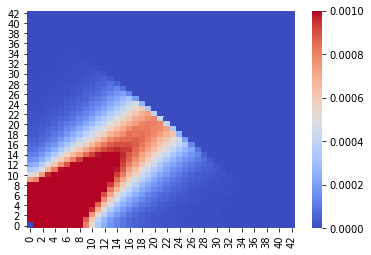

In [44]:
infile="./Dataset8/Thuja_3_MSFS.obs"
format_simulatedSFS(infile)
plot_ObsReplicateSFS("tempSFSfile.obs", "SimulatedSFSmodel3.png", normalize=True, writeOut=True, sim=True, pop1size=pop1, pop2size=pop2, reps=100, vmax=vmax)

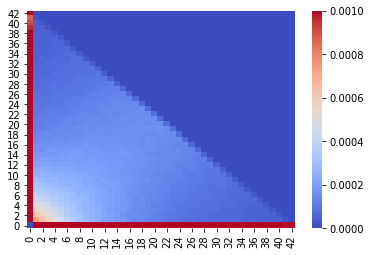

In [45]:
infile="./Dataset8/Thuja_4_MSFS.obs"
format_simulatedSFS(infile)
plot_ObsReplicateSFS("tempSFSfile.obs", "SimulatedSFSmodel4.png", normalize=True, writeOut=True, sim=True, pop1size=pop1, pop2size=pop2, reps=100, vmax=vmax)

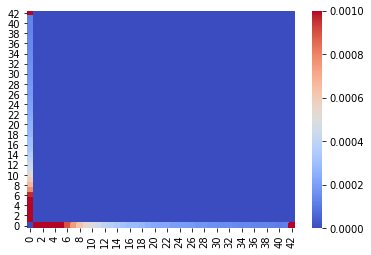

In [113]:
infile="./Dataset8/Thuja_5_MSFS.obs"
format_simulatedSFS(infile)
plot_ObsReplicateSFS("tempSFSfile.obs", "SimulatedSFSmodel5.png", normalize=True, writeOut=True, sim=True, pop1size=pop1, pop2size=pop2, reps=100, vmax=0.001)

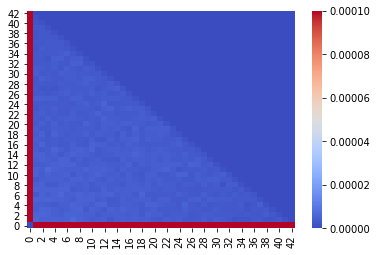

In [115]:
infile="./Dataset8/Thuja_6_MSFS.obs"
format_simulatedSFS(infile)
plot_ObsReplicateSFS("tempSFSfile.obs", "SimulatedSFSmodel6.png", normalize=True, writeOut=True, sim=True, pop1size=pop1, pop2size=pop2, reps=100, vmax=0.0001)

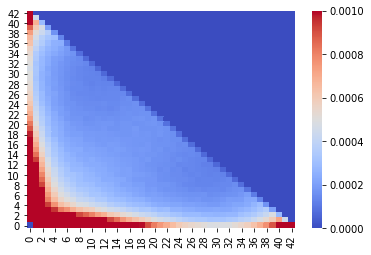

In [48]:
infile="./Dataset8/Thuja_7_MSFS.obs"
format_simulatedSFS(infile)
plot_ObsReplicateSFS("tempSFSfile.obs", "SimulatedSFSmodel7.png", normalize=True, writeOut=True, sim=True, pop1size=pop1, pop2size=pop2, reps=100, vmax=vmax)

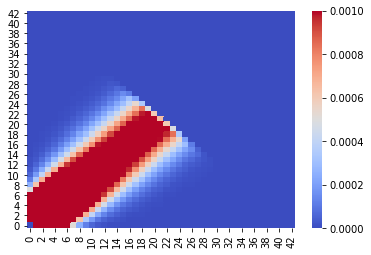

In [64]:
infile="./Dataset8/Thuja_8_MSFS.obs"
format_simulatedSFS(infile)
plot_ObsReplicateSFS("tempSFSfile.obs", "SimulatedSFSmodel8.png", normalize=True, writeOut=True, sim=True, pop1size=pop1, pop2size=pop2, reps=100, vmax=vmax)

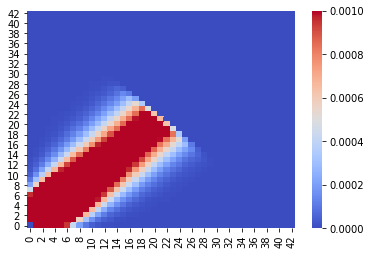

In [63]:
infile="./Dataset8/Thuja_9_MSFS.obs"
format_simulatedSFS(infile)
plot_ObsReplicateSFS("tempSFSfile.obs", "SimulatedSFSmodel9.png", normalize=True, writeOut=True, sim=True, pop1size=pop1, pop2size=pop2, reps=100, vmax=vmax)

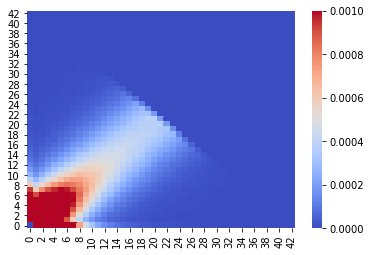

In [62]:
infile="./Dataset8/Thuja_10_MSFS.obs"
format_simulatedSFS(infile)
plot_ObsReplicateSFS("tempSFSfile.obs", "SimulatedSFSmodel10.png", normalize=True, writeOut=True, sim=True, pop1size=pop1, pop2size=pop2, reps=100, vmax=vmax)

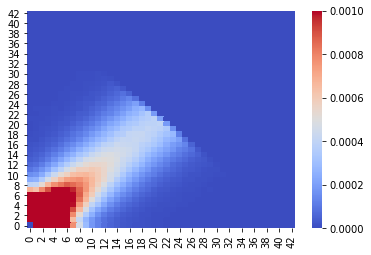

In [61]:
infile="./Dataset8/Thuja_11_MSFS.obs"
format_simulatedSFS(infile)
plot_ObsReplicateSFS("tempSFSfile.obs", "SimulatedSFSmodel11.png", normalize=True, writeOut=True, sim=True, pop1size=pop1, pop2size=pop2, reps=100, vmax=vmax)